## 역전파

### 덧셈 노드의 역전파
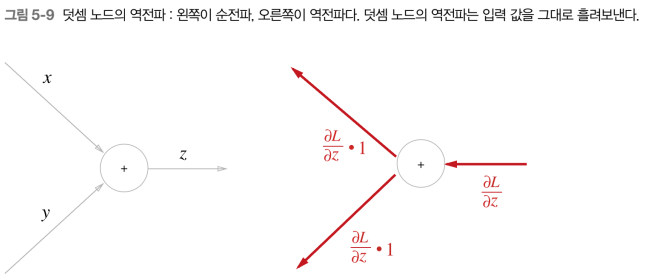
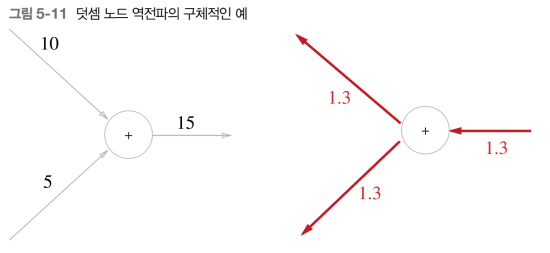

In [1]:

class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy


### 곱셈 노드의 역전파
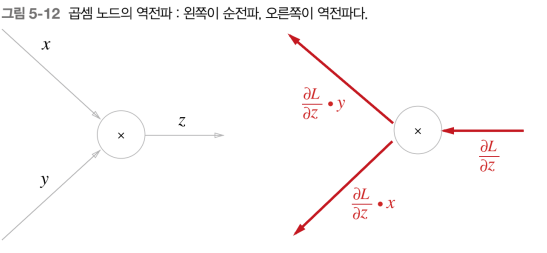
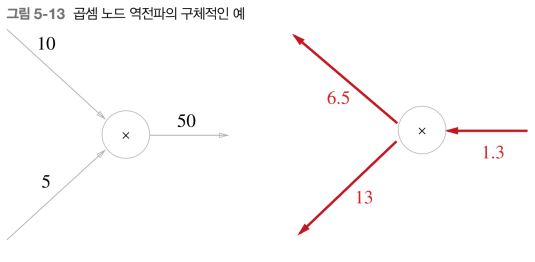

In [3]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy

In [4]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)


price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)


price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


In [6]:
715/650

1.1

## 활성화 함수 계층 구현

### relu

In [7]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [9]:
import numpy as np
relu = Relu()

dout = np.array([[1.0, 2.0], [3.0, 4.0]])

# Backward pass
backward_out = relu.backward(dout)
print("\nBackward output:")
print(backward_out)


Backward output:
[[0. 0.]
 [0. 0.]]


In [10]:
import numpy as np

# 예시 데이터
x = np.array([[1.0, -0.5], [-2.0, 3.0]])

# Relu 클래스 사용 예시
relu = Relu()

# Forward pass
forward_out = relu.forward(x)
print("Forward output:")
print(forward_out)

# 예시 역전파 데이터 (임의의 gradient)
dout = np.array([[1.0, 2.0], [3.0, 4.0]])

# Backward pass
backward_out = relu.backward(dout)
print("\nBackward output:")
print(backward_out)

Forward output:
[[1. 0.]
 [0. 3.]]

Backward output:
[[1. 0.]
 [0. 4.]]


### Sigmoid

In [12]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        # forward가 호출되지 않았을 경우 에러 메시지를 출력
        if self.out is None:
            raise ValueError("forward 메서드를 먼저 호출해야 합니다. 'self.out'이 None 상태입니다.")

        # backward 연산
        dx = dout * (1.0 - self.out) * self.out
        return dx


In [13]:
# 예시 역전파 데이터 (임의의 gradient)
dout = np.array([[0.1, 0.2], [0.3, 0.4]])

sigmoid = Sigmoid()
# Backward pass
backward_out = sigmoid.backward(dout)
print("\nBackward output:")
print(backward_out)

ValueError: forward 메서드를 먼저 호출해야 합니다. 'self.out'이 None 상태입니다.

In [14]:
np.array([[0.5, -1.0], [2.0, -0.5]])*5

array([[ 2.5, -5. ],
       [10. , -2.5]])

In [16]:
v=np.array([[0.5, -1.0], [2.0, -0.5]])
(lambda x : (x+1)*25)(v)

array([[37.5,  0. ],
       [75. , 12.5]])

In [17]:
# 예시 데이터
x = np.array([[0.5, -1.0], [2.0, -0.5]])

# Sigmoid 클래스 사용 예시
sigmoid = Sigmoid()

# Forward pass
forward_out = sigmoid.forward(x)
print("Forward output:")
print(forward_out)

Forward output:
[[0.62245933 0.26894142]
 [0.88079708 0.37754067]]


In [18]:
# 예시 역전파 데이터 (임의의 gradient)
dout = np.array([[0.1, 0.2], [0.3, 0.4]])

# Backward pass
backward_out = sigmoid.backward(dout)
print("\nBackward output:")
print(backward_out)


Backward output:
[[0.02350037 0.03932239]
 [0.03149808 0.09400148]]


### Affine/softmax

# Affine 연산에서 역전파 시 전치행렬을 사용하는 이유
### ∂L/∂X = ∂L/∂Y ⋅ W^T 유도 과정

Affine 변환에서 역전파 시 전치 행렬이 등장하는 이유를 명확히 이해하기 위해, 구체적인 예시를 통해 유도 과정을 설명하겠습니다.

## 1. Affine 변환의 기본 수식

Affine 변환은 다음과 같은 수식으로 표현됩니다:

$$
Y = XW + B
$$

- $ X $: 입력 데이터 (batch size, input dimension)
- $ W $: 가중치 행렬 (input dimension, output dimension)
- $ B $: 편향 (bias)
- $ Y $: 출력 데이터 (batch size, output dimension)

## 2. 목표: ∂L/∂X를 구하는 과정

손실 함수 $ L $이 있을 때, 우리는 $ L $에 대한 $ X $의 기울기인 $ \frac{\partial L}{\partial X} $를 구하고자 합니다.  
이를 위해, 역전파 과정에서 미분을 수행해야 합니다.

### 3. 미분을 통한 유도 과정

우선, $ L $에 대한 $ Y $의 미분은 다음과 같이 주어집니다:

$$
\frac{\partial L}{\partial Y}
$$

이제, Chain Rule(연쇄 법칙)을 사용하여 $ \frac{\partial L}{\partial X} $를 계산합니다. 이를 위해 $ Y $를 $ X $와 $ W $의 함수로 표현한 다음, 이를 미분합니다:

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial X}
$$

Affine 변환의 수식 $ Y = XW + B $에서 $ X $에 대한 $ Y $의 미분은 다음과 같습니다:

$$
\frac{\partial Y}{\partial X} = W
$$

따라서, 다음과 같이 나타낼 수 있습니다:

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \cdot W^T
$$

여기서 $ W^T $는 $ W $의 전치행렬입니다.  
왜 전치 행렬이 필요한가 하면, Affine 변환에서 $ X $와 $ W $가 행렬 곱으로 연산되기 때문에, 역전파에서는 미분을 구할 때 행렬의 차원이 반대로 적용됩니다.

### 4. 구체적인 예시

- $ X $: $ (batch size \times input\ dimension) $
- $ W $: $ (input\ dimension \times output\ dimension) $
- $ Y $: $ (batch size \times output\ dimension) $
- $ \frac{\partial L}{\partial Y} $: $ (batch size \times output\ dimension) $

역전파 시 $ \frac{\partial L}{\partial X} $의 차원은 $ (batch size \times input\ dimension) $이 되어야 하므로,  
$ \frac{\partial L}{\partial Y} $에 $ W $의 전치행렬 $ W^T $를 곱해주어야 합니다.  
전치 행렬 $ W^T $의 크기는 $ (output\ dimension \times input\ dimension) $이므로,  
결과적으로 다음과 같은 차원 관계가 성립합니다:

$$
(batch\ size \times output\ dimension) \cdot (output\ dimension \times input\ dimension) = (batch\ size \times input\ dimension)
$$

이를 통해 $ \frac{\partial L}{\partial X} $의 정확한 차원을 얻을 수 있습니다.

## 5. 결론

Affine 연산에서 역전파 시 전치 행렬이 사용되는 이유는, 행렬 곱의 차원을 맞추기 위해서입니다. Forward 연산에서는 $ X $와 $ W $의 차원이 $ (batch\ size \times input\ dimension) $와 $ (input\ dimension \times output\ dimension) $로 맞아 떨어지지만, 역전파에서는 $ \frac{\partial L}{\partial Y} $와 $ \frac{\partial Y}{\partial X} $를 곱할 때, 전치 행렬을 사용하여 차원을 맞춰야 하기 때문입니다.


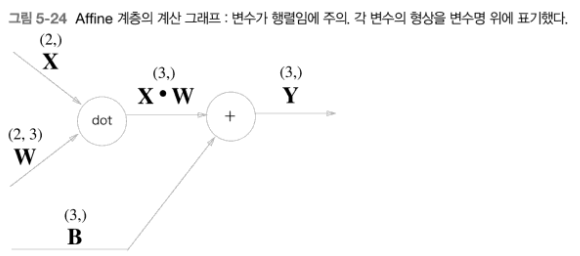
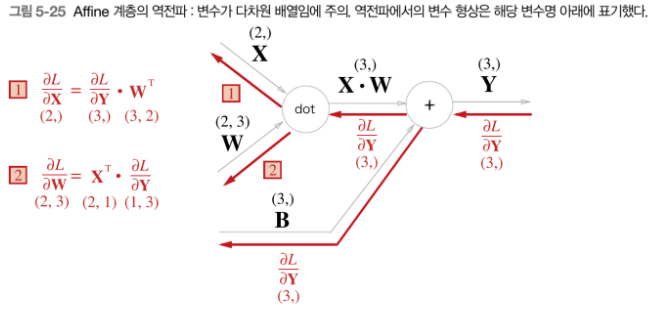

In [20]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        print(self.original_x_shape)
        x = x.reshape(x.shape[0], -1)
        print(x.shape)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx


In [21]:
# 입력 차원: 4, 출력 차원: 3
np.random.seed(42)

W = np.random.randn(4, 3)
b = np.random.randn(3)

# 배치 크기: 2, 입력 차원: 4
x = np.random.randn(2, 4)

print(x,"\n")

affine = Affine(W, b)
out = affine.forward(x)
print("Forward output:")
print(out,"\n")

print("backward output:")
print(affine.backward(out))

[[-0.56228753 -1.01283112  0.31424733 -0.90802408]
 [-1.4123037   1.46564877 -0.2257763   0.0675282 ]] 

(2, 4)
(2, 4)
Forward output:
[[-1.57630011 -0.93641939 -1.57660107]
 [ 1.45276715 -2.265758   -2.908267  ]] 

backward output:
[[-1.67464364 -1.81234579 -2.46778027  0.31298589]
 [-0.84876775  3.42407541  1.92076398  3.19267223]]


In [25]:
out,np.sum(out,axis=0),affine.db,-1.57630011+1.45276715

(array([[-1.57630011, -0.93641939, -1.57660107],
        [ 1.45276715, -2.265758  , -2.908267  ]]),
 array([-0.12353296, -3.20217739, -4.48486807]),
 array([-0.12353296, -3.20217739, -4.48486807]),
 -0.12353296000000014)

In [26]:
affine.forward(np.array(range(0,12)).reshape(-1,4))

(3, 4)
(3, 4)


array([[ 6.55109789, -2.00281724, -4.29519282],
       [23.11716536, -2.2764198 , -6.38180306],
       [39.68323284, -2.55002236, -8.46841329]])

In [27]:
print(affine.x, "\n")
print(affine.W, "\n")
print(affine.x.T, "\n")
print(affine.W.T, "\n")


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]] 

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]] 

[[ 0.49671415  1.52302986  1.57921282  0.54256004]
 [-0.1382643  -0.23415337  0.76743473 -0.46341769]
 [ 0.64768854 -0.23413696 -0.46947439 -0.46572975]] 



In [28]:
# dout은 forward 연산의 출력과 같은 차원을 가져야 함
dout = np.random.randn(3, 3)

# backward 연산 수행
dx = affine.backward(dout)
print("\n입력값들이 출력 오차에 얼마나 영향을 주는지를 나타내는 정도 (dx):")
print(dx)
print("\n가중치들이 출력 오차에 얼마나 영향을 주는지를 나타내는 정도 (dW):")
print(affine.dW)
print("\n편향들이 출력 오차에 얼마나 영향을 주는지를 나타내는 정도 (db):")
print(affine.db)



입력값들이 출력 오차에 얼마나 영향을 주는지를 나타내는 정도 (dx):
[[-0.5605806  -2.06843605 -2.71983412 -0.5723948 ]
 [-1.01268722 -1.70033683 -1.24735562 -0.51885293]
 [ 1.13800548 -0.73705343 -1.79201422 -0.74208095]]

가중치들이 출력 오차에 얼마나 영향을 주는지를 나타내는 정도 (dW):
[[ -6.93752431  -3.31086082  12.41567072]
 [ -9.80495982  -4.08125214  13.7782328 ]
 [-12.67239533  -4.85164346  15.14079488]
 [-15.53983085  -5.62203478  16.50335697]]

편향들이 출력 오차에 얼마나 영향을 주는지를 나타내는 정도 (db):
[-2.86743551 -0.77039132  1.36256208]


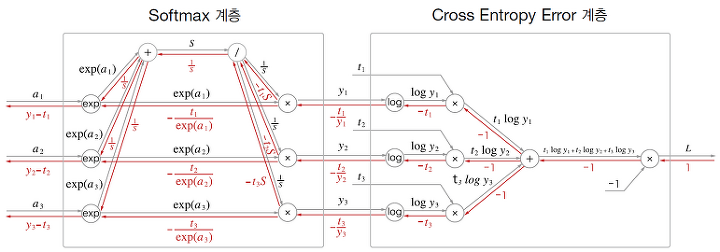

In [29]:
from common.functions import softmax, cross_entropy_error
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        print(self.y)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            print("opperation 1")
            dx = (self.y - self.t) / batch_size
        else:
            print("opperation 2")
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

In [31]:
x = np.array([[2.0, 0.5, -1.0], [1.0, 3.0, -0.5]])  # 입력 (예측 점수)
t = np.array([[1, 0, 0], [0, 1, 0]])  # 원-핫 인코딩된 정답 레이블

# SoftmaxWithLoss 클래스 사용 예시
softmax_loss = SoftmaxWithLoss()

# Forward 계산 (손실 값 출력)
loss = softmax_loss.forward(x, t)
print("Loss:", loss)

# Backward 계산 (역전파, 기울기 출력)
grad = softmax_loss.backward()
print("Gradient:\n", grad)

[[0.78559703 0.17529039 0.03911257]
 [0.11611453 0.85797681 0.02590865]]
Loss: 0.19724462996723546
opperation 1
Gradient:
 [[-0.10720148  0.0876452   0.01955629]
 [ 0.05805727 -0.07101159  0.01295433]]


### 모델 완전 구현

In [32]:
from collections import OrderedDict

# 성적 데이터를 OrderedDict로 생성
grades = OrderedDict()
grades['Alice'] = 85
grades['Bob'] = 90
grades['Charlie'] = 78

# 성적 출력
print("학생 성적:")
for student, score in grades.items():
    print(f"{student}: {score}")

# 성적 업데이트
grades['Alice'] = 88

# 업데이트된 성적 출력
print("\n업데이트된 성적:")
for student, score in grades.items():
    print(f"{student}: {score}")


학생 성적:
Alice: 85
Bob: 90
Charlie: 78

업데이트된 성적:
Alice: 88
Bob: 90
Charlie: 78


In [34]:
# coding: utf-8
import sys
import os
import numpy as np
from collections import OrderedDict
from common.layers import Affine, Relu, SoftmaxWithLoss
from common.gradient import numerical_gradient

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {
            'W1': weight_init_std * np.random.randn(input_size, hidden_size),
            'b1': np.zeros(hidden_size),
            'W2': weight_init_std * np.random.randn(hidden_size, output_size),
            'b2': np.zeros(output_size),
        }

        # 계층 생성
        """
        feedforward의 구성요소들 정의
        """
        self.layers = OrderedDict([
            ('Affine1', Affine(self.params['W1'], self.params['b1'])),
            ('Relu1', Relu()),
            ('Affine2', Affine(self.params['W2'], self.params['b2'])),
        ])
        
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y_pred = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1) if t.ndim != 1 else t
        return np.mean(y_pred == t)
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {key: numerical_gradient(loss_W, param) for key, param in self.params.items()}
        return grads
        
    def gradient(self, x, t):
        # Forward
        self.loss(x, t)

        # Backward
        dout = self.lastLayer.backward(1)
        
        # 역전파 과정의 로그를 출력
        print("Backward Pass:")
        
        for i, (name, layer) in enumerate(reversed(self.layers.items())):
            print(f"Layer {abs(i-2)} ({name}) - 미분의 shape:", dout.shape)
            dout = layer.backward(dout) # 각 레이어에서는 각자의 미분값을 속성으로 저장함
            # print(f"Layer {abs(i-2)} ({name}) - 입력 오차의 shape:", dout.shape)

        # 결과 저장

        return {
            'W1': self.layers['Affine1'].dW,
            'b1': self.layers['Affine1'].db,
            'W2': self.layers['Affine2'].dW,
            'b2': self.layers['Affine2'].db,
        }

## 오차역전파로 기울기 검증

In [35]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))


Backward Pass:
Layer 2 (Affine2) - 미분의 shape: (3, 10)
Layer 1 (Relu1) - 미분의 shape: (3, 50)
Layer 0 (Affine1) - 미분의 shape: (3, 50)
W1:4.5655670738756034e-10
b1:2.682262406367847e-09
W2:5.77898354608744e-09
b2:1.403900228388877e-07


In [45]:
[print(f"{k}-->{v.shape}")for k,v in grad_backprop.items()]

W1-->(784, 50)
b1-->(50,)
W2-->(50, 10)
b2-->(10,)


[None, None, None, None]

In [46]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


Backward Pass:
Layer 2 (Affine2) - 출력 오차의 shape: (100, 10)
Layer 2 (Affine2) - 입력 오차의 shape: (100, 50)
Layer 1 (Relu1) - 출력 오차의 shape: (100, 50)
Layer 1 (Relu1) - 입력 오차의 shape: (100, 50)
Layer 0 (Affine1) - 출력 오차의 shape: (100, 50)
Layer 0 (Affine1) - 입력 오차의 shape: (100, 784)
0.1095 0.1086
Backward Pass:
Layer 2 (Affine2) - 출력 오차의 shape: (100, 10)
Layer 2 (Affine2) - 입력 오차의 shape: (100, 50)
Layer 1 (Relu1) - 출력 오차의 shape: (100, 50)
Layer 1 (Relu1) - 입력 오차의 shape: (100, 50)
Layer 0 (Affine1) - 출력 오차의 shape: (100, 50)
Layer 0 (Affine1) - 입력 오차의 shape: (100, 784)
Backward Pass:
Layer 2 (Affine2) - 출력 오차의 shape: (100, 10)
Layer 2 (Affine2) - 입력 오차의 shape: (100, 50)
Layer 1 (Relu1) - 출력 오차의 shape: (100, 50)
Layer 1 (Relu1) - 입력 오차의 shape: (100, 50)
Layer 0 (Affine1) - 출력 오차의 shape: (100, 50)
Layer 0 (Affine1) - 입력 오차의 shape: (100, 784)
Backward Pass:
Layer 2 (Affine2) - 출력 오차의 shape: (100, 10)
Layer 2 (Affine2) - 입력 오차의 shape: (100, 50)
Layer 1 (Relu1) - 출력 오차의 shape: (100, 50)
Layer 1 (Relu